# Logistic Regression  
dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database  
model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

number of correct sample: 165
accuracy: 0.7142857142857143


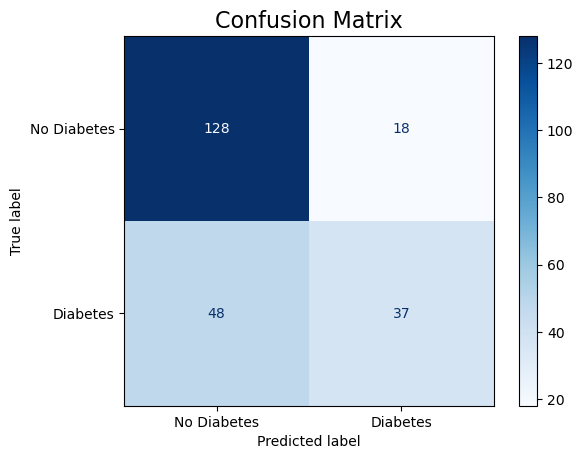

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#1.讀取 diabetes.csv 資料
diabetes = pd.read_csv('./diabetes.csv')

#2.用'pregnant','insulin','bmi', 'age', 'pedigree' 五個變數預測'label'(是否發病)
X=diabetes[['pregnant', 'insulin', 'bmi', 'age', 'pedigree']]
y=diabetes['label']

#3.使用train_test_split將資料 7:3做分割，其中random_state=1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#4.對訓練資料及測試資料做標準化
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test_nor = scaler.transform(X_test)

#5.建立LogisticRegression並訓練
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test_nor)

#6.計算準確率
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

#7.計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

#8.繪製混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.show()